# Operadores de qubit único

## Definição

As matrizes de Pauli são dadas por
$$
X=\begin{pmatrix}0 & 1\\ 1 & 1\end{pmatrix}; Y=\begin{pmatrix}0 & -i\\ i & 0\end{pmatrix};Z=\begin{pmatrix}1 & 0\\ 0 & -1\end{pmatrix}
$$

## Autovetores das matrizes de Pauli

Seus autovetores são dados pelo calculo a seguir

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(vec):
    return vec / np.linalg.norm(vec)

def eig(ops):
    results = {}
    for name, M in ops.items():
        vals, vecs = np.linalg.eig(M)
        norm_vecs = [normalize(vecs[:, i]) for i in range(vecs.shape[1])]
        results[name] = {'eigenvalues': vals, 'eigenvectors': norm_vecs}
    
    return results

X = np.array([[0, 1],[1, 0]])
Y = np.array([[0, -1j],[1j, 0]])
Z = np.array([[1, 0],[0, -1]])

PauliOp = {'X': X, 'Y': Y, 'Z': Z}

results = eig(PauliOp)

for name, data in results.items():
    print(name, data)


X {'eigenvalues': array([ 1., -1.]), 'eigenvectors': [array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678])]}
Y {'eigenvalues': array([ 1.+0.j, -1.+0.j]), 'eigenvectors': [array([-0.        -0.70710678j,  0.70710678+0.j        ]), array([0.70710678+0.j        , 0.        -0.70710678j])]}
Z {'eigenvalues': array([ 1., -1.]), 'eigenvectors': [array([1., 0.]), array([0., 1.])]}


**Para X**

- $\lambda_{-1}: \ket{-}=\cfrac{\ket{0}-\ket{1}}{\sqrt{2}}$
- $\lambda_{+1}: \ket{+}=\cfrac{\ket{0}+\ket{1}}{\sqrt{2}}$

**Para Y**

- $\lambda_{-1}: \ket{-i}=\cfrac{\ket{0}-i\ket{1}}{\sqrt{2}}$
- $\lambda_{+1}: \ket{+i}=\cfrac{\ket{0}+i\ket{1}}{\sqrt{2}}$

**Para Z**

- $\lambda_{-1}: \ket{0}$
- $\lambda_{+1}: \ket{1}$

que são os pontos dos eixos $X,Y,Z$ da Esfera de Bloch.

## Desenho na Esfera de Bloch

O código a seguir exibe os autovetores de $X,Y$ e $Z$ na Esfera de Bloch.

In [2]:

def bloch_coords(vec):
    v = vec / np.linalg.norm(vec)  # normalize
    alpha, beta = v[0], v[1]
    theta = 2*np.arccos(np.abs(alpha))
    phi = np.angle(beta) - np.angle(alpha)
    # Bloch sphere coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    return x, y, z

def plotFullAxis(ax):
    zero = np.array([1, 0])                 # |0>
    one  = np.array([0, 1])                 # |1>
    plus = np.array([1, 1]) / np.sqrt(2)    # |+> = (|0>+|1>)/√2
    minus = np.array([1, -1]) / np.sqrt(2)  # |-> = (|0>-|1>)/√2
    plus_i = np.array([1, 1j]) / np.sqrt(2) # |+i> = (|0>+i|1>)/√2
    minus_i = np.array([1, -1j]) / np.sqrt(2) # |-i> = (|0>-i|1>)/√2

    states_full = {
        "|0>": zero,
        "|1>": one,
        "|+>": plus,
        "|->": minus,
        "|+i>": plus_i,
        "|-i>": minus_i
    }
    color_map = {
        "|0>":"blue", "|1>":"blue",     # Z axis states
        "|+>":"red", "|->":"red",       # X axis states
        "|+i>":"green", "|-i>":"green"  # Y axis states
    }

    coords_states_full = {name: bloch_coords(vec) for name, vec in states_full.items()}
    for name, (x,y,z) in coords_states_full.items():
        ax.scatter(x, y, z, color=color_map[name], s=100)
        ax.text(x*1.3, y*1.6, z*1.6, name, fontsize=10)

def plotVecs(coords, labels):
    colors = {'X': 'red', 'Y': 'green', 'Z': 'blue'}
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    # Draw sphere wireframe
    u = np.linspace(0, 2*np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones_like(u), np.cos(v))
    ax.plot_wireframe(xs, ys, zs, color='lightgray', alpha=0.3)

    plotFullAxis(ax)

    # Plot eigenvectors
    for (x, y, z, name), label in zip(coords, labels):
        ax.quiver(0, 0, 0, x, y, z, color=colors[name], linewidth=2)
        ax.text(x*0.4, y*0.4, z*0.4, label, fontsize=8)

    ax.set_title("Representação dos autovetores das matrizes de Pauli na Esfera de Bloch")

    plt.show()

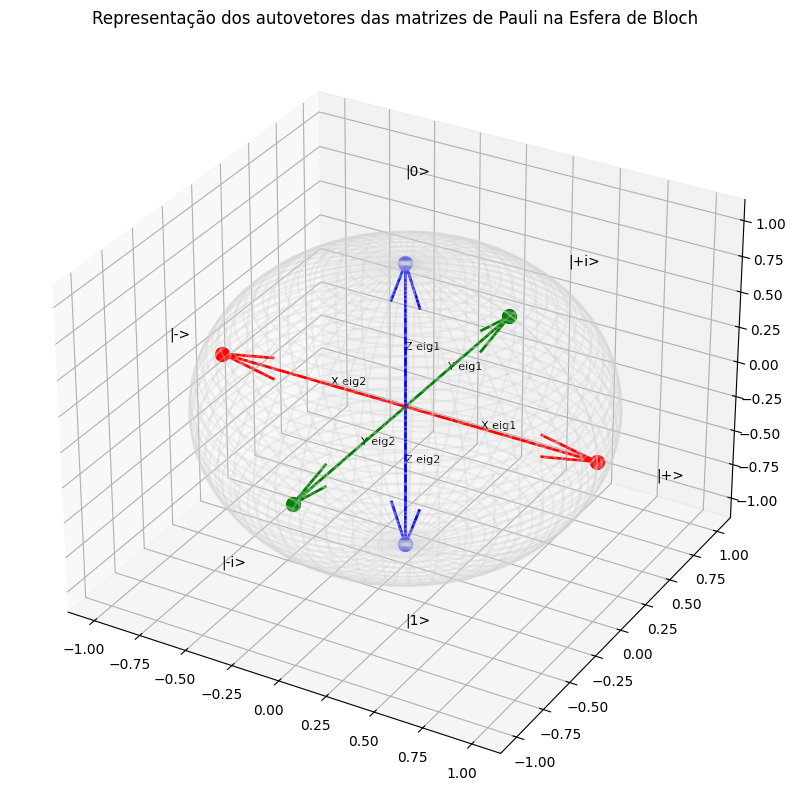

In [3]:
coords = []
labels = []

for name, data in results.items():
    for i, vec in enumerate(data['eigenvectors']):
        x, y, z = bloch_coords(vec)
        coords.append((x, y, z, name))
        labels.append(f"{name} eig{i+1}")

plotVecs(coords=coords, labels=labels)

## Operadores de rotação

Da expressão
$$
exp(iAx) = \cos(x)I + i\sin(x) A
$$
e das matrizes de Pauli, podemos construir os *operadores de rotação*
$$
R_x(\theta) = \exp\bigg(\frac{i\theta X}{2}\bigg); R_y(\theta) = \exp\bigg(\frac{i\theta Y}{2}\bigg); R_z(\theta) = \exp\bigg(\frac{i\theta Z}{2}\bigg)
$$

Além disso, sendo $T$ o operador $\pi/8$ dado por
$$
T=\begin{pmatrix}1 & 0 \\ 0 & \exp(i\pi/4)\end{pmatrix}
$$
pode ser escrito como
$$
\exp(i\pi/8)\cdot R_z(\pi/4) = \exp(i\pi/8) \cdot (\cos(\pi/8)I - i \sin (\pi/8)Z) = \exp(i\pi/8) \cdot\begin{pmatrix}\cos(\pi/8) - i \sin (\pi/8) & 0 \\ 0 & \cos(\pi/8) + i \sin (\pi/8) \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & \exp(i\pi/4) \end{pmatrix}.
$$
Ou seja, por um fator de fase global $T=R_z(\pi/4)$.